# Importing Libraries

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from wordcloud import WordCloud

#### Constants



In [715]:
DATA='EURUSD'
HOURS_BEFORE=2
HOURS_AFTER=24
# price columns
PRICE_COLUMNS = [str(num)+'h' for num in np.arange(-HOURS_BEFORE,HOURS_AFTER+1)]
# extended_columns
EVENT_COLUMNS = ['time','currency','description','impact','actual','deviation','consensus','previous','result']

PREDICTED_FUTURE_PRICES = ['1h','3h','5h']

PRICES_TO_DROP = PRICE_COLUMNS
for price in PREDICTED_FUTURE_PRICES:
    PRICES_TO_DROP.remove(price)
PRICES_TO_DROP.remove('0h')

PRICES_TO_DROP
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')

['-2h',
 '-1h',
 '2h',
 '4h',
 '6h',
 '7h',
 '8h',
 '9h',
 '10h',
 '11h',
 '12h',
 '13h',
 '14h',
 '15h',
 '16h',
 '17h',
 '18h',
 '19h',
 '20h',
 '21h',
 '22h',
 '23h',
 '24h']

In [664]:
EVENT_COLUMNS

['time',
 'currency',
 'description',
 'impact',
 'actual',
 'deviation',
 'consensus',
 'previous',
 'result']

In [665]:
PRICE_COLUMNS

['-2h',
 '-1h',
 '0h',
 '1h',
 '2h',
 '3h',
 '4h',
 '5h',
 '6h',
 '7h',
 '8h',
 '9h',
 '10h',
 '11h',
 '12h',
 '13h',
 '14h',
 '15h',
 '16h',
 '17h',
 '18h',
 '19h',
 '20h',
 '21h',
 '22h',
 '23h',
 '24h']

# Load Data

In [666]:
frame = pd.read_csv('./data/economic_events_'+DATA+'.csv',index_col=['time'],header=0)
frame.index = pd.to_datetime(frame.index,format='%Y-%m-%d %H:%M:%S%z')

frame.rename(columns={'hex_color_actual':'result'},inplace=True)
# type(frame.index[100])

# Create MultiIndex
# frame['time'] = pd.to_datetime(frame['time'],format='%Y-%m-%d %H:%M:%S%z',utc=True)
# frame.set_index(['time','currency','description'])


C:\Users\shrey\AppData\Local\Temp\ipykernel_23796\704890658.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  frame.index = pd.to_datetime(frame.index,format='%Y-%m-%d %H:%M:%S%z')


In [667]:
frame.tail()

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2024-06-14 09:00:00+01:00,EUR,Global Trade Balance(Apr),low,€4.807B,0.24,€4.25B,€4.296B,green,1.07073,1.06915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 10:00:00+01:00,EUR,Trade Balance n.s.a.(Apr),low,€15B,-0.33,€20B,€23.7B,red,1.06915,1.06868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 13:30:00+01:00,USD,Export Price Index (MoM)(May),low,-0.6%,-1.39,0%,0.6%,red,1.06934,1.06888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 13:30:00+01:00,USD,Import Price Index (MoM)(May),low,-0.4%,-1.65,0.1%,0.9%,red,1.06934,1.06888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 15:00:00+01:00,USD,Michigan Consumer Sentiment Index(Jun) PREL,high,65.6,-1.60,72,69.1,red,1.06688,1.06866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [668]:
frame.shape

(29600, 35)

In [669]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29600 entries, 2013-01-02 09:13:00+00:00 to 2024-06-14 15:00:00+01:00
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   currency     29600 non-null  object 
 1   description  29600 non-null  object 
 2   impact       29600 non-null  object 
 3   actual       29600 non-null  object 
 4   deviation    29600 non-null  object 
 5   consensus    29600 non-null  object 
 6   previous     29600 non-null  object 
 7   result       29600 non-null  object 
 8   -2h          27771 non-null  float64
 9   -1h          27772 non-null  float64
 10  0h           27766 non-null  float64
 11  1h           27733 non-null  float64
 12  2h           27674 non-null  float64
 13  3h           27651 non-null  float64
 14  4h           27641 non-null  float64
 15  5h           27623 non-null  float64
 16  6h           27271 non-null  float64
 17  7h           26984 non-null  float64
 18  8h     

In [670]:
frame.describe().T

,count,mean,std,min,25%,50%,75%,max
-2h,27771.0,1.153696,0.090814,0.95555,1.091730,1.128550,1.188990,1.39562
-1h,27772.0,1.153682,0.090833,0.95388,1.091690,1.128550,1.188900,1.39629
0h,27766.0,1.153633,0.090816,0.95437,1.091670,1.128375,1.189070,1.39629
1h,27733.0,1.153586,0.090801,0.95558,1.091700,1.128180,1.189190,1.39629
2h,27674.0,1.153503,0.090835,0.95437,1.091673,1.128090,1.188890,1.39543
3h,27651.0,1.153441,0.090816,0.95739,1.091730,1.127920,1.188530,1.39543
4h,27641.0,1.153448,0.090777,0.95655,1.091720,1.128030,1.188630,1.39492
5h,27623.0,1.153434,0.090771,0.95845,1.091400,1.128040,1.188495,1.39492
6h,27271.0,1.153789,0.090904,0.95930,1.091540,1.128270,1.188430,1.39334
7h,26984.0,1.153769,0.090833,0.95811,1.091770,1.128325,1.188210,1.39339


In [671]:
frame.columns

Index(['currency', 'description', 'impact', 'actual', 'deviation', 'consensus',
       'previous', 'result', '-2h', '-1h', '0h', '1h', '2h', '3h', '4h', '5h',
       '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h',
       '17h', '18h', '19h', '20h', '21h', '22h', '23h', '24h'],
      dtype='object')

In [672]:
frame.head()

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 09:13:00+00:00,EUR,HCOB Manufacturing PMI(Dec),low,44.6,-0.48,45.1,45.3,red,1.32733,1.32809,...,1.31821,1.31703,1.31267,1.31387,1.31371,1.31382,1.31452,1.31339,1.31636,1.3147
2013-01-02 09:43:00+00:00,EUR,HCOB Manufacturing PMI(Dec),low,46.7,1.20,45.3,45.1,green,1.32733,1.32809,...,1.31821,1.31703,1.31267,1.31387,1.31371,1.31382,1.31452,1.31339,1.31636,1.3147
2013-01-02 09:48:00+00:00,EUR,HCOB Manufacturing PMI(Dec),low,44.6,0.00,44.6,44.6,black,1.32733,1.32809,...,1.31821,1.31703,1.31267,1.31387,1.31371,1.31382,1.31452,1.31339,1.31636,1.3147
2013-01-02 09:53:00+00:00,EUR,HCOB Manufacturing PMI(Dec),medium,46,-0.28,46.3,46.3,red,1.32733,1.32809,...,1.31821,1.31703,1.31267,1.31387,1.31371,1.31382,1.31452,1.31339,1.31636,1.3147
2013-01-02 09:58:00+00:00,EUR,HCOB Manufacturing PMI(Dec),medium,46.1,-0.32,46.3,46.3,red,1.32733,1.32809,...,1.31821,1.31703,1.31267,1.31387,1.31371,1.31382,1.31452,1.31339,1.31636,1.3147


In [673]:
frame.tail()

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2024-06-14 09:00:00+01:00,EUR,Global Trade Balance(Apr),low,€4.807B,0.24,€4.25B,€4.296B,green,1.07073,1.06915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 10:00:00+01:00,EUR,Trade Balance n.s.a.(Apr),low,€15B,-0.33,€20B,€23.7B,red,1.06915,1.06868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 13:30:00+01:00,USD,Export Price Index (MoM)(May),low,-0.6%,-1.39,0%,0.6%,red,1.06934,1.06888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 13:30:00+01:00,USD,Import Price Index (MoM)(May),low,-0.4%,-1.65,0.1%,0.9%,red,1.06934,1.06888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 15:00:00+01:00,USD,Michigan Consumer Sentiment Index(Jun) PREL,high,65.6,-1.60,72,69.1,red,1.06688,1.06866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing values

1. First we will check the events for which all the prices columns are null

In [674]:
# frame.drop(frame[PRICE_COLUMNS].isnull().all(axis=1),inplace=True)
frame[frame[PRICE_COLUMNS].isnull().all(axis=1)].tail()

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2024-05-31 13:30:00+01:00,USD,Personal Consumption Expenditures - Price Inde...,medium,0.3%,0.00,0.3%,0.3%,black,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 13:30:00+01:00,USD,Personal Consumption Expenditures - Price Inde...,medium,2.7%,0.00,2.7%,2.7%,black,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 13:30:00+01:00,USD,Personal Income (MoM)(Apr),medium,0.3%,0.00,0.3%,0.5%,black,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 13:30:00+01:00,USD,Personal Spending(Apr),medium,0.2%,-0.62,0.3%,0.7%,red,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 14:45:00+01:00,USD,Chicago Purchasing Managers' Index(May),medium,35.4,-3.50,41,37.9,red,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [675]:
frame[frame[PRICE_COLUMNS].isnull().all(axis=1)].shape
# frame.loc[frame[PRICE_COLUMNS].isnull()].tail()

(399, 35)

In [676]:
frame.dropna(subset=PRICE_COLUMNS, how='all',inplace=True)

In [677]:
frame[frame[PRICE_COLUMNS].isnull().all(axis=1)]

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,


2.  Since we are going to predict based on the previous values. till 0h we need prices of till 0h to predict the future prices(1h,2h...)

In [678]:
hours = [ str(i)+'h' for i in range(-HOURS_BEFORE,1)]
# hours = [ str(i)+'h' for i in range(0,1)]
hours

['-2h', '-1h', '0h']

In [679]:
frame.loc[frame[hours].isnull().any(axis=1),'impact':].tail()

,impact,actual,deviation,consensus,previous,result,-2h,-1h,0h,1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2024-04-30 10:00:00+01:00,medium,0.9%,-2.04,1%,1.2%,red,NaN,NaN,NaN,NaN,...,1.06602,1.06585,1.06561,1.06554,1.06550,1.06513,1.06606,1.06689,1.06695,1.06686
2024-04-30 13:30:00+01:00,medium,1.2%,2.04,1%,0.9%,green,NaN,NaN,NaN,NaN,...,1.06554,1.06550,1.06513,1.06606,1.06689,1.06695,1.06686,1.06713,1.06838,1.06814
2024-04-30 14:00:00+01:00,medium,1.2%,5.34,0.1%,-0.1%,green,NaN,NaN,NaN,NaN,...,1.06550,1.06513,1.06606,1.06689,1.06695,1.06686,1.06713,1.06838,1.06814,1.06827
2024-04-30 14:00:00+01:00,low,7.3%,3.75,6.7%,6.6%,green,NaN,NaN,NaN,NaN,...,1.06550,1.06513,1.06606,1.06689,1.06695,1.06686,1.06713,1.06838,1.06814,1.06827
2024-04-30 14:45:00+01:00,medium,37.9,-1.23,44.9,41.4,red,NaN,NaN,NaN,NaN,...,1.06550,1.06513,1.06606,1.06689,1.06695,1.06686,1.06713,1.06838,1.06814,1.06827


**Since we need the prvious values to forcast the future values(1h,3h,5h) and since we dont have much data to fullfill future values we are dropping the values**

In [680]:
frame.dropna(subset=hours,how='any',inplace=True)


In [681]:
frame.isnull().sum()

currency          0
description       0
impact            0
actual            0
deviation         0
consensus         0
previous          0
result            0
-2h               0
-1h               0
0h                0
1h               35
2h               94
3h              117
4h              127
5h              147
6h              502
7h              789
8h             2023
9h             2517
10h            3094
11h            3793
12h            4834
13h            5842
14h            6878
15h            7634
16h            8041
17h            8209
18h            8258
19h            8263
20h            8263
21h            8263
22h            8263
23h            8265
24h            8276
dtype: int64

In [700]:
frame.loc[frame[PREDICTED_FUTURE_PRICES].isnull().any(axis=1),PREDICTED_FUTURE_PRICES].tail()

,1h,3h,5h
time,,,
2023-10-20 19:00:00+01:00,1.059130,NaN,NaN
2024-01-30 22:30:00+00:00,1.084260,NaN,NaN
2024-04-05 20:00:00+01:00,1.082070,NaN,NaN
2024-05-10 19:00:00+01:00,1.077030,NaN,NaN
2024-06-07 20:00:00+01:00,1.077065,NaN,NaN


In [702]:
for price_column in PREDICTED_FUTURE_PRICES:
    frame[price_column] = frame[price_column].interpolate(method='linear',axis=0)
    frame[price_column].isnull().sum()


In [684]:
frame.loc[frame['1h'].isnull(),'result':].tail()

,result,-2h,-1h,0h,1h,2h,3h,4h,5h,6h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,


# Feature Engineering

## Feature Selection

### Dropping off the unwanted columns

1. The values in the actual deviation consensus and preivous is in different format(%,Million, Billion,) and the information is already extracted by featching the result part in the dataframe so we dont need it.

In [703]:
frame.drop(columns=['actual','deviation','consensus','previous'],inplace=True)

2. Sice we are only planning to work with the PREDICTED_FUTURE_PRICES constant values we will drop another prices columns which we dont need  

In [716]:
frame.drop(PRICES_TO_DROP,axis=1,inplace=True)

In [592]:
frame.index

Index([2013-01-02 09:13:00+00:00, 2013-01-02 09:43:00+00:00,
       2013-01-02 09:48:00+00:00, 2013-01-02 09:53:00+00:00,
       2013-01-02 09:58:00+00:00, 2013-01-02 14:00:00+00:00,
       2013-01-02 14:00:00+00:00, 2013-01-02 14:00:00+00:00,
       2013-01-02 14:00:00+00:00, 2013-01-02 14:58:00+00:00,
       ...
       2024-06-13 13:30:00+01:00, 2024-06-13 13:30:00+01:00,
       2024-06-13 15:30:00+01:00, 2024-06-14 07:45:00+01:00,
       2024-06-14 07:45:00+01:00, 2024-06-14 09:00:00+01:00,
       2024-06-14 10:00:00+01:00, 2024-06-14 13:30:00+01:00,
       2024-06-14 13:30:00+01:00, 2024-06-14 15:00:00+01:00],
      dtype='object', name='time', length=29600)

### Time based features

In [606]:
frame.index
# frame['hour_of_day'] = frame.index.hour
# frame['day_of_week'] = frame.index.dayofweek


Index([2013-01-02 09:13:00+00:00, 2013-01-02 09:43:00+00:00,
       2013-01-02 09:48:00+00:00, 2013-01-02 09:53:00+00:00,
       2013-01-02 09:58:00+00:00, 2013-01-02 14:00:00+00:00,
       2013-01-02 14:00:00+00:00, 2013-01-02 14:00:00+00:00,
       2013-01-02 14:00:00+00:00, 2013-01-02 14:58:00+00:00,
       ...
       2024-06-13 13:30:00+01:00, 2024-06-13 13:30:00+01:00,
       2024-06-13 15:30:00+01:00, 2024-06-14 07:45:00+01:00,
       2024-06-14 07:45:00+01:00, 2024-06-14 09:00:00+01:00,
       2024-06-14 10:00:00+01:00, 2024-06-14 13:30:00+01:00,
       2024-06-14 13:30:00+01:00, 2024-06-14 15:00:00+01:00],
      dtype='object', name='time', length=29600)

In [413]:
# Moving averages
for window in [3, 6, 12]:
    frame[f'moving_average_{window}h_before'] = frame[[f'{i}h' for i in range(-3, 0)]].mean(axis=1).rolling(window=window).mean()
    frame[f'moving_average_{window}h_after'] = frame[[f'{i}h' for i in range(1, 21)]].mean(axis=1).rolling(window=window).mean()

# Volatility (standard deviation)
for window in [3, 6, 12]:
    frame[f'volatility_{window}h_before'] = frame[[f'{i}h' for i in range(-3, 0)]].std(axis=1).rolling(window=window).std()
    frame[f'volatility_{window}h_after'] = frame[[f'{i}h' for i in range(1, 21)]].std(axis=1).rolling(window=window).std()


In [553]:
# Calculate price changes
PRICE_COLUMNS = [ str(i)+'h' for i in range(-HOURS_BEFORE+1,HOURS_AFTER+1)]
# for i in range(len(PRICE_COLUMNS) - 1):
#     frame[f'price_change_{PRICE_COLUMNS[i+1]}'] = frame[PRICE_COLUMNS[i+1]] - frame[PRICE_COLUMNS[i]]
frame[f'price_change_1h'] = frame['1h'] - frame['0h']


<Axes: >

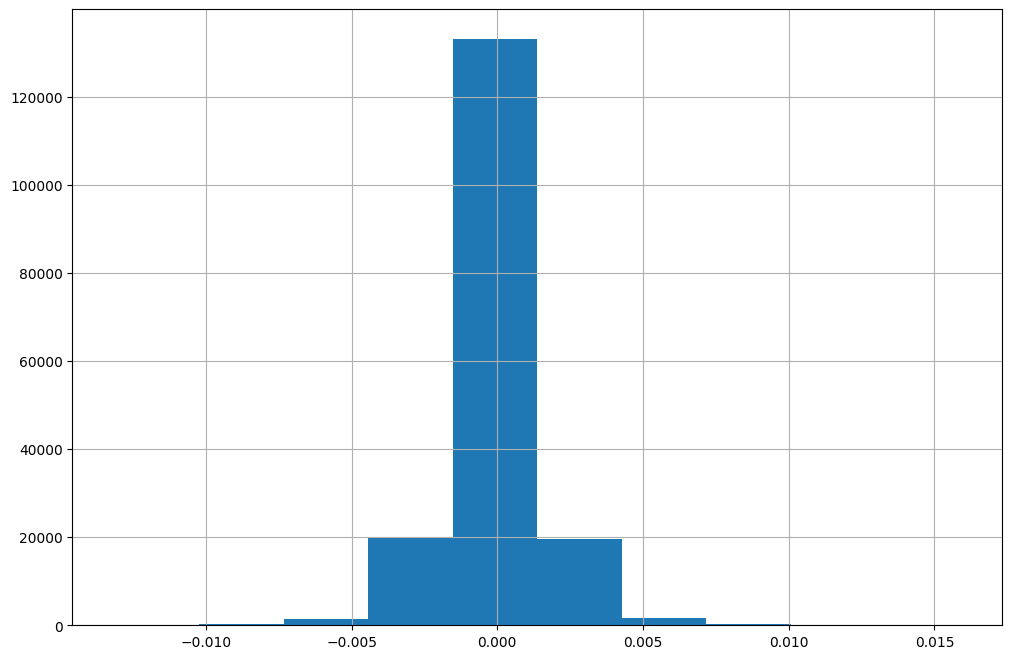

In [554]:
frame['price_change_1h'].hist(figsize=(12,8))

In [555]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 176490 entries, (Timestamp('2013-01-02 09:13:00'), 'EUR', 'HCOB Manufacturing PMI(Dec)') to (Timestamp('2024-05-24 15:00:00'), 'USD', 'UoM 5-year Consumer Inflation Expectation(May)')
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   impact           176490 non-null  int64  
 1   result           176490 non-null  int64  
 2   -3h              176490 non-null  float64
 3   -2h              176490 non-null  float64
 4   -1h              176490 non-null  float64
 5   0h               176490 non-null  float64
 6   1h               176490 non-null  float64
 7   hour_of_day      176490 non-null  int32  
 8   day_of_week      176490 non-null  int32  
 9   price_change_1h  176490 non-null  float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 13.7+ MB


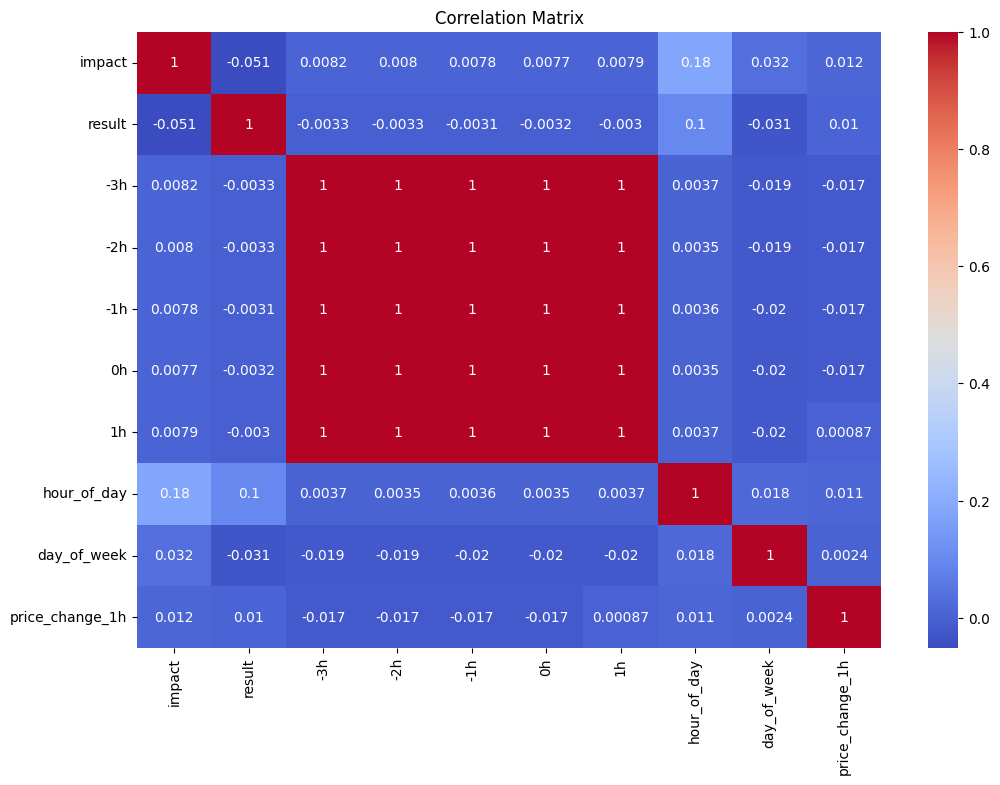

In [556]:
# Correlation Analysis
correlation_matrix = frame.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

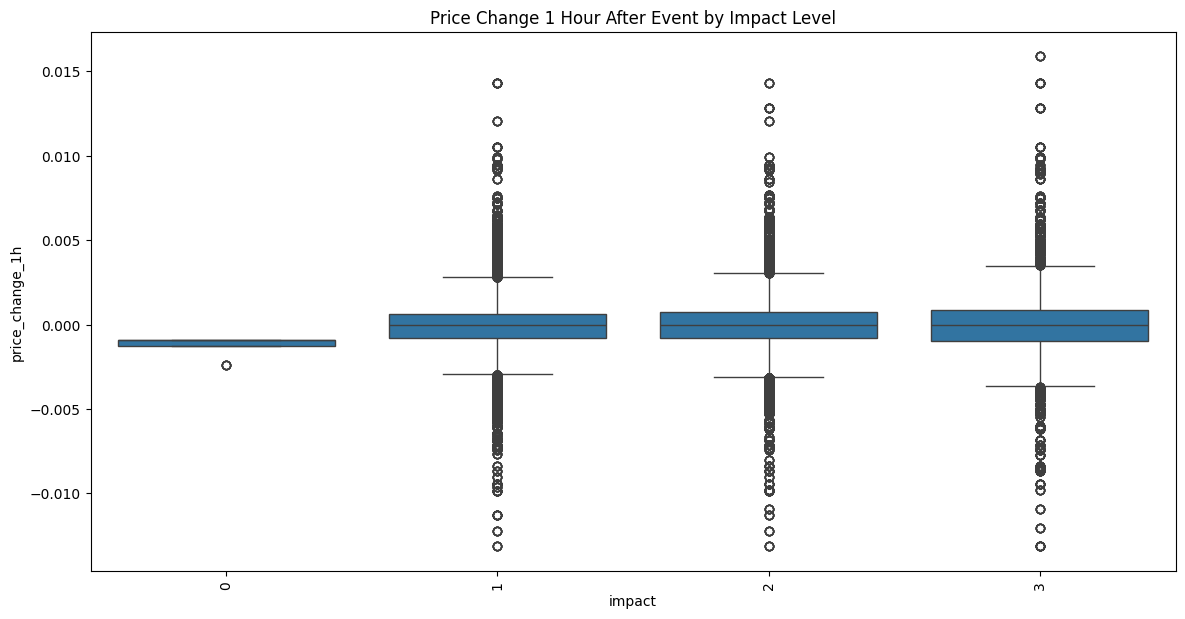

In [557]:
# Impact of Events
plt.figure(figsize=(14, 7))
sns.boxplot(x='impact', y='price_change_1h', data=frame)
plt.title('Price Change 1 Hour After Event by Impact Level')
plt.xticks(rotation=90)
plt.show()

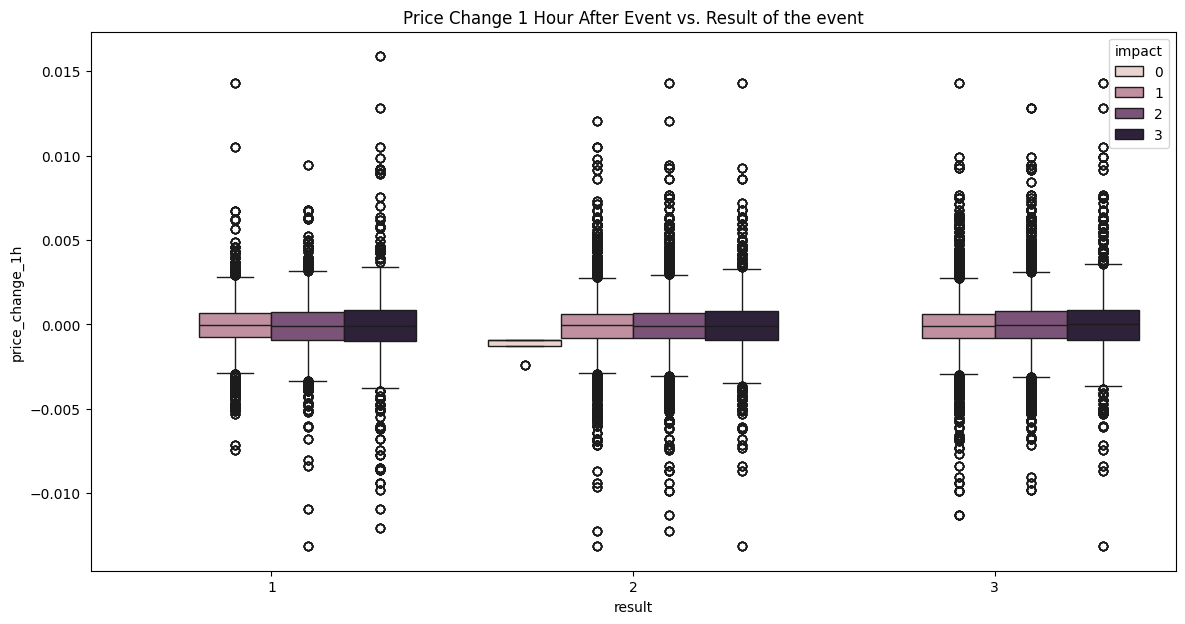

In [561]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='result', y='price_change_1h', hue='impact', data=frame)
plt.title('Price Change 1 Hour After Event vs. Result of the event')
plt.show()



# Visualization

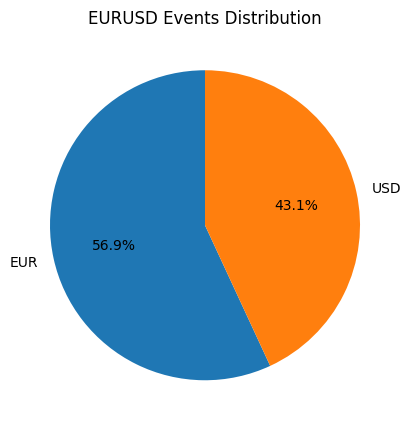

currency
EUR    15799
USD    11963
Name: count, dtype: int64

In [469]:
currency_row_count = frame['currency'].value_counts()
fig,ax = plt.subplots(figsize=(5,8))
ax.pie(currency_row_count, autopct='%1.1f%%', startangle=90,labels=currency_row_count.index)
ax.set_title(DATA + ' Events Distribution')
plt.show()

currency_row_count


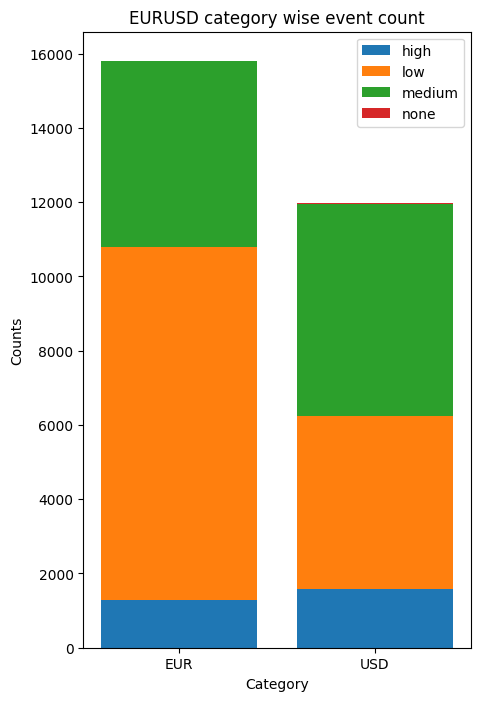

currency  impact
EUR       low       9492
USD       medium    5734
EUR       medium    5009
USD       low       4647
          high      1581
EUR       high      1295
          none         3
USD       none         1
Name: count, dtype: int64

In [470]:
currency_impact = frame[['currency','impact']].value_counts()
currency_impact_count = frame.groupby(['currency','impact']).size().unstack(fill_value=0)
fig,ax = plt.subplots(figsize=(5,8))
bottom = None
for impact in currency_impact_count.columns:
    if bottom is None:
        p = ax.bar(currency_impact_count.index, currency_impact_count[impact], label=impact)
        bottom = currency_impact_count[impact]
    else:
        p = ax.bar(currency_impact_count.index, currency_impact_count[impact], bottom=bottom, label=impact)
        bottom += currency_impact_count[impact]
ax.set_xlabel('Category')
ax.set_ylabel('Counts')
ax.legend()
ax.set_title( DATA + ' category wise event count')
plt.show()

currency_impact_count
currency_impact

In [471]:
frame[frame['impact']=='none'].tail()

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,
2015-05-21 13:30:00+01:00,USD,Continuing Jobless Claims(May 8),none,2.211M,-0.70,2.231M,2.223M,green,1.11390,1.11638,...,1.11335,1.11459,1.11398,1.11455,1.11525,1.11567,1.11687,1.11919,1.11848,1.11626
2015-07-27 09:00:00+01:00,EUR,IFO – Business Climate(Jul),none,108,1.39,107.2,100.2,green,1.10052,1.10280,...,1.10858,1.10882,1.10974,1.10922,1.10824,1.10740,1.10791,1.10790,1.10561,1.10602
2015-07-27 09:00:00+01:00,EUR,IFO – Current Assessment(Jul),none,113.9,0.84,113,100.4,green,1.10052,1.10280,...,1.10858,1.10882,1.10974,1.10922,1.10824,1.10740,1.10791,1.10790,1.10561,1.10602
2015-07-27 09:00:00+01:00,EUR,IFO – Expectations(Jul),none,102.4,0.94,101.8,100.1,green,1.10052,1.10280,...,1.10858,1.10882,1.10974,1.10922,1.10824,1.10740,1.10791,1.10790,1.10561,1.10602


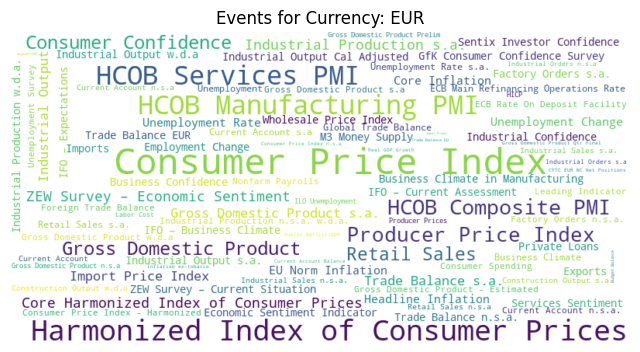

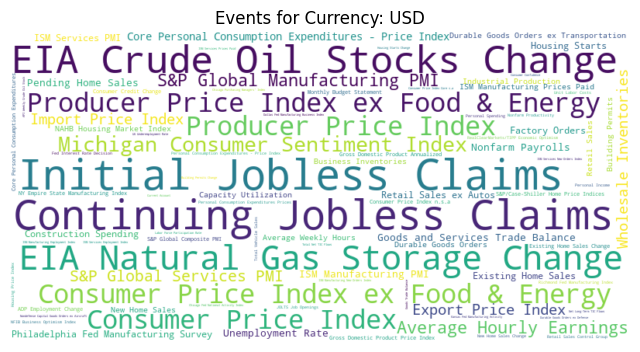

In [472]:
def process_description(description):
    if '(' in description:
        return description[:description.index('(')].strip()
    else:
        return description.strip()
for currency in frame['currency'].unique():
    # Filter descriptions for the current currency
    descriptions = frame[frame['currency'] == currency]['description'].apply(process_description).value_counts()
    d = dict(zip(descriptions.index,descriptions.values))
    # # Generate word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(d)
    # Plot the WordCloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Events for Currency: {currency}')
    plt.show()

In [473]:
pd.concat([frame['currency'],frame['description'].apply(process_description)], axis=1)[['currency','description']].value_counts()

currency  description                        
EUR       Consumer Price Index                   2077
          Harmonized Index of Consumer Prices    1302
          HCOB Services PMI                      1093
          HCOB Manufacturing PMI                 1087
          HCOB Composite PMI                      668
                                                 ... 
          Purchasing Manager Index Services         1
          Manufacturing Output                      1
          Industrial Production                     1
          Gross Domestic Product Qtr Prelim         1
USD       20-Year Bond Auction                      1
Name: count, Length: 200, dtype: int64

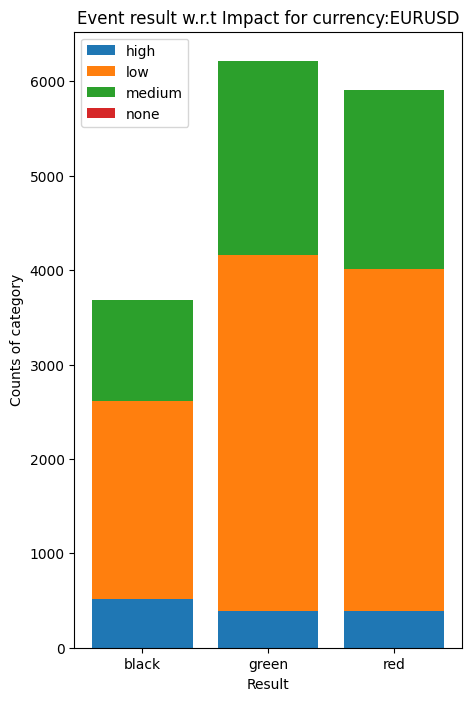

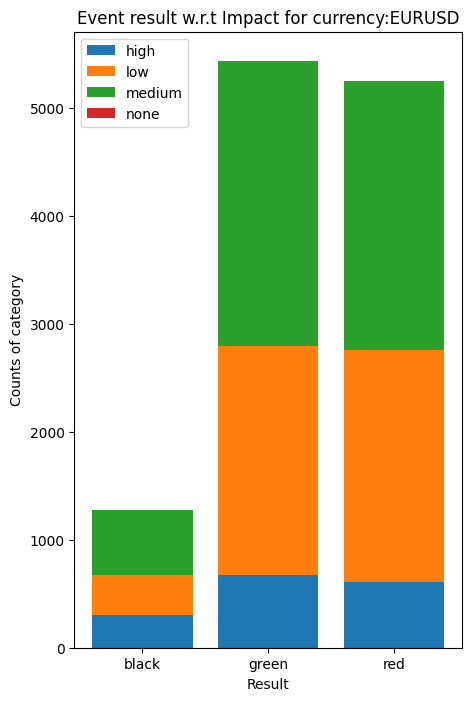

currency  impact  result
EUR       low     green     3775
                  red       3627
USD       medium  green     2640
                  red       2494
          low     red       2150
                  green     2121
EUR       low     black     2090
          medium  green     2048
                  red       1893
                  black     1068
USD       high    green      672
                  red        608
          medium  black      600
EUR       high    black      521
                  green      389
                  red        385
USD       low     black      376
          high    black      301
EUR       none    green        3
USD       none    green        1
Name: count, dtype: int64

In [474]:
color_map = {
    'green': '#66b3ff',
    'red': '#ff9999',
    'black': '#99ff99'
}
for currency in frame['currency'].unique():
    subframe = frame[frame['currency'] == currency]
    # currency_impact = subframe[['impact','result']].value_counts()
    currency_impact_count = subframe.groupby(['result','impact']).size().unstack(fill_value=0)
    fig,ax = plt.subplots(figsize=(5,8))
    bottom = None
    for impact in currency_impact_count.columns:
        if bottom is None:
            p = ax.bar(currency_impact_count.index, currency_impact_count[impact], label=impact)
            bottom = currency_impact_count[impact]
        else:
            p = ax.bar(currency_impact_count.index, currency_impact_count[impact], bottom=bottom, label=impact)
            bottom += currency_impact_count[impact]
    ax.set_xlabel('Result')
    ax.set_ylabel('Counts of category')
    ax.legend()
    ax.set_title('Event result w.r.t Impact for currency:' + DATA)
    plt.show()

    currency_impact_count
    currency_impact
frame[['currency','impact','result']].value_counts()

In [488]:
# for result in frame['result'].unique():
#     print(result)
#     fig,ax = plt.subplots(figure=(12,8))
#     ax.hist((frame[frame['result']==result]['1h']-frame[frame['result']==result]['0h']).std())
#     plt.show()


# frame['diff_1h_0h'] = frame['1h'] - frame['0h']

# # Group by 'result' and calculate the mean of the differences
# # result_diff_mean = frame.groupby('result')['diff_1h_0h']

# # Plotting
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.bar(result_diff_mean.index, result_diff_mean.values)
# ax.set_xlabel('Result')
# ax.set_ylabel('Mean Difference (1h - 0h)')
# ax.set_title('Mean Difference between 1h and 0h by Result')
# plt.show()

In [489]:
# Vi/sualize the correlation matrix
# plt.figure(figsize=(12, 8))
# correlation_matrix = frame[PRICE_COLUMNS].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()



In [480]:
frame[frame.duplicated()].tail()


,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,


In [482]:
frame.loc[frame.duplicated(), :]

,currency,description,impact,actual,deviation,consensus,previous,result,-2h,-1h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
time,,,,,,,,,,,,,,,,,,,,,


In [490]:
# Visualize the impact of 'impact' on EURUSD prices
# frame.columns
# sns.boxplot(x='result', y='1h', data=frame)
# plt.title('Impact on EURUSD Prices after 1 Hour')
# plt.show()

In [491]:
# frame['deviation'] = frame.deviation.replace('-',None).astype(np.float64)

In [402]:
frame.deviation.value_counts().tail()

deviation
-5.28     6
-7.42     6
-4.71     6
 14.75    6
 7.06     6
Name: count, dtype: int64

In [403]:
frame.result.value_counts()

result
green    73812
red      70998
black    31722
Name: count, dtype: int64

### Encoding the columns

In [ ]:
# Encode 'description' as categorical
description_dummies = pd.get_dummies(frame.index.get_level_values('description'), drop_first=True)

# impact
impact_mapping = {'none': 0,'low': 1, 'medium': 2, 'high': 3}
frame['impact'] = frame['impact'].map(impact_mapping)

# result
result_mapping = {'black': 1, 'green': 2, 'red': 3}
frame['result'] = frame['result'].map(result_mapping)